# XGBoost - Breast Canser (Classification)

[ch9-kaggle-winners.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch9-kaggle-winners.ipynb)

In [1]:
!pip install xgboost

You should consider upgrading via the '/Users/ksdyb/.pyenv/versions/3.9.12/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import time

In [4]:
from sklearn.datasets import load_breast_cancer

## Define Feature and Target

In [5]:
X, y = load_breast_cancer(return_X_y=True)

In [6]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [7]:
pd.DataFrame(X).isna().sum().sum()

0

In [8]:
pd.DataFrame(y).value_counts()

1    357
0    212
dtype: int64

## Classification Model Selection

In [9]:
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5)

def cross_validation(model):
    start = time.time()
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold)
    # scores = cross_val_score(model, X, y, scoring='recall', cv=kfold)
    
    print('Cross Validation:')
    print('Elased time: %0.2fs' % (time.time()-start))
    print('Accuracy:', np.round(scores, 2))
    print('Avg. Accuracy: %0.2f' % (scores.mean()))

In [10]:
cross_validation(XGBClassifier(booster='gbtree'))  # default

Cross Validation:
Elased time: 0.52s
Accuracy: [0.97 0.96 0.99 0.98 0.98]
Avg. Accuracy: 0.98


In [11]:
cross_validation(XGBClassifier(booster='gblinear'))

Cross Validation:
Elased time: 0.16s
Accuracy: [0.96 0.96 0.96 0.97 0.98]
Avg. Accuracy: 0.97


In [12]:
cross_validation(XGBClassifier(booster='dart', one_drop=1))

Cross Validation:
Elased time: 3.74s
Accuracy: [0.96 0.96 0.99 0.97 0.97]
Avg. Accuracy: 0.97


In [13]:
from sklearn.ensemble import RandomForestClassifier

cross_validation(RandomForestClassifier())

Cross Validation:
Elased time: 0.41s
Accuracy: [0.93 0.95 0.99 0.97 0.96]
Avg. Accuracy: 0.96


## HPO

### Default

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# define model
model = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

default_score = 0

# default model accuacry 
def getAccuracy(model):
    start = time.time()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    default_score = accuracy_score(y_pred, y_test)

    print('Elapsed time: %0.2fs' % (time.time()-start))    
    print('default score: %0.2f' % (default_score))

getAccuracy(model)

Elapsed time: 0.08s
default score: 0.95


In [15]:
# learning_rate_values
param = 'learning_rate_values'
values = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
best_param = 0
best_score = 0
cnt = 0
start = time.time()

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(learning_rate=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1

print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score), 'default_score: %0.2f' % (default_score))
print('advanced score: %0.2f' % (best_score - default_score))
print('best param: ', values[best_param])
learning_rate_values = values[best_param]

Accuracy Score: 0.93
Accuracy Score: 0.92
Accuracy Score: 0.94
Accuracy Score: 0.94
Accuracy Score: 0.95
Accuracy Score: 0.95
Accuracy Score: 0.94
Accuracy Score: 0.94
Accuracy Score: 0.94

Elased time: 0.95s
best score: 0.95 default_score: 0.00
advanced score: 0.95
best param:  0.2


In [16]:
# max_depth
param = 'max_depth'
values = [1, 2, 3, 5, 6, 8]
best_param = 0
best_score = 0
cnt = 0
start = time.time()

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(max_depth=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1
    
print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score), 'default_score: %0.2f' % (default_score))
print('advanced score: %0.2f' % (best_score - default_score))
print('best param: ', values[best_param])
max_depth = values[best_param]

Accuracy Score: 0.95
Accuracy Score: 0.95
Accuracy Score: 0.96
Accuracy Score: 0.95
Accuracy Score: 0.95
Accuracy Score: 0.95

Elased time: 0.39s
best score: 0.96 default_score: 0.00
advanced score: 0.96
best param:  3


In [17]:
# gamma
param = 'gamma'
values = [0, 0.01, 0.1, 0.5, 1, 2]
best_param = 0
best_score = 0
cnt = 0
start = time.time()

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(gamma=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1
    
print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score), 'default_score: %0.2f' % (default_score))
print('advanced score: %0.2f' % (best_score - default_score))
print('best param: ', values[best_param])
gamma = values[best_param]

Accuracy Score: 0.95
Accuracy Score: 0.95
Accuracy Score: 0.94
Accuracy Score: 0.94
Accuracy Score: 0.94
Accuracy Score: 0.93

Elased time: 0.53s
best score: 0.95 default_score: 0.00
advanced score: 0.95
best param:  0


In [18]:
# min_child_weight
param = 'min_child_weight'
values = [1, 2, 3, 4, 5]
best_param = 0
best_score = 0
cnt = 0
start = time.time()

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(min_child_weight=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1
    
print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score), 'default_score: %0.2f' % (default_score))
print('advanced score: %0.2f' % (best_score - default_score))
print('best param: ', values[best_param])
min_child_weight = values[best_param]

Accuracy Score: 0.95
Accuracy Score: 0.94
Accuracy Score: 0.94
Accuracy Score: 0.96
Accuracy Score: 0.94

Elased time: 0.30s
best score: 0.96 default_score: 0.00
advanced score: 0.96
best param:  4


In [19]:
# subsample
param = 'subsample'
values = [0.5, 0.7, 0.8, 0.9, 1]
best_param = 0
best_score = 0
cnt = 0
start = time.time()

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(subsample=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1
    
print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score), 'default_score: %0.2f' % (default_score))
print('advanced score: %0.2f' % (best_score - default_score))
print('best param: ', values[best_param])
subsample = values[best_param]

Accuracy Score: 0.97
Accuracy Score: 0.96
Accuracy Score: 0.97
Accuracy Score: 0.95
Accuracy Score: 0.95

Elased time: 0.37s
best score: 0.97 default_score: 0.00
advanced score: 0.97
best param:  0.5


In [20]:
# colsample_bytree
param = 'colsample_bytree'
values = [0.5, 0.7, 0.8, 0.9, 1]
best_param = 0
best_score = 0
cnt = 0
start = time.time()

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(colsample_bytree=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1

print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score), 'default_score: %0.2f' % (default_score))
print('advanced score: %0.2f' % (best_score - default_score))
print('best param: ', values[best_param])
colsample_bytree = values[best_param]

Accuracy Score: 0.95
Accuracy Score: 0.96
Accuracy Score: 0.97
Accuracy Score: 0.96
Accuracy Score: 0.95

Elased time: 0.37s
best score: 0.97 default_score: 0.00
advanced score: 0.97
best param:  0.8


In [21]:
# n_estimators
param = 'n_estimators'
values = [50, 100, 200, 400, 800]
best_param = 0
best_score = 0
cnt = 0
start = time.time()

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(n_estimators=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1

print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score), 'default_score: %0.2f' % (default_score))
print('advanced score: %0.2f' % (best_score - default_score))
print('best param: ', values[best_param])
n_estimators = values[best_param]

Accuracy Score: 0.94
Accuracy Score: 0.95
Accuracy Score: 0.95
Accuracy Score: 0.95
Accuracy Score: 0.95

Elased time: 0.70s
best score: 0.95 default_score: 0.00
advanced score: 0.95
best param:  100


In [22]:
xgb = XGBClassifier(learning_rate_values=learning_rate_values, max_depth=max_depth, gamma=gamma, min_child_weight=min_child_weight, subsample=subsample, colsample_bytree=colsample_bytree, n_estimators=n_estimators)
    
xgb.fit(X_train, y_train)
    
y_pred = xgb.predict(X_test)
    
score = accuracy_score(y_pred, y_test)

print('Accuracy Score: %0.2f' % (score))
print('advanced score: %0.2f' % (score - default_score))

Accuracy Score: 0.95
advanced score: 0.95


In [23]:
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

## HPO: Randomized Search

In [24]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    rand_clf = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=runs, n_jobs=-1, random_state=2, scoring='accuracy')
    
    rand_clf.fit(X_train, y_train)    
    
    best_model = rand_clf.best_estimator_    
    
    best_params = rand_clf.best_params_
    print("best parameter:", best_params)
    
    best_score = rand_clf.best_score_
    print("best score: {:.3f}".format(best_score))
    
    # print("rand_clf.cv_results_: ", rand_clf.cv_results_)
    report(rand_clf.cv_results_)
    
    return best_model

In [25]:
import time
start = time.time()

best_model = randomized_search(
    params={
        'n_estimators':[50, 100, 200],
        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
        'max_depth':[1, 2, 3, 5, 6, 8],
        'gamma':[0, 0.01, 0.1, 0.5, 1, 2],
        'min_child_weight':[1, 2, 3, 4, 5],
        'subsample':[0.5, 0.7, 0.8, 0.9, 1],
        'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1],  
        }, 
    runs=20)

print('\nElased time: %0.2fs' % (time.time()-start))

best parameter: {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.5, 'gamma': 1, 'colsample_bytree': 0.9}
best score: 0.974
Model with rank: 1
Mean validation score: 0.974 (std: 0.019)
Parameters: {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.5, 'gamma': 1, 'colsample_bytree': 0.9}

Model with rank: 2
Mean validation score: 0.972 (std: 0.025)
Parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 1}

Model with rank: 3
Mean validation score: 0.970 (std: 0.017)
Parameters: {'subsample': 1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.5, 'gamma': 1, 'colsample_bytree': 0.9}

Model with rank: 4
Mean validation score: 0.965 (std: 0.021)
Parameters: {'subsample': 1, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.4, 'gamma': 0.5, 'colsample

In [26]:
best_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.9,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 1,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.5,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 3,
 'max_leaves': 0,
 'min_child_weight': 2,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 0.9,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0}

## Evaluation

In [27]:
model = best_model

def model_estimation(model):    
    y_pred = model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

    from sklearn.metrics import classification_report
    print('\nClassification Report:')
    print(classification_report(y_true=y_test, y_pred = y_pred))

    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
    print('Accuracy Score: %0.2f' % (accuracy_score(y_test,y_pred)))
    print('Precision Score: %0.2f' % (precision_score(y_test,y_pred)))
    print('Recall Score: %0.2f' % (recall_score(y_test,y_pred)))
    print('F1 Score: %0.2f' % (f1_score(y_test,y_pred)))

cross_validation(model)   
model_estimation(model)    

Cross Validation:
Elased time: 0.32s
Accuracy: [0.96 0.97 0.99 0.98 0.96]
Avg. Accuracy: 0.97

Confusion Matrix:
[[54  2]
 [ 7 80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        56
           1       0.98      0.92      0.95        87

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

Accuracy Score: 0.94
Precision Score: 0.98
Recall Score: 0.92
F1 Score: 0.95


## Feature Importances

Feature Importances:
[0.         0.01752203 0.         0.         0.01453316 0.0080379
 0.         0.057694   0.         0.         0.         0.
 0.         0.04841376 0.         0.         0.         0.
 0.00762192 0.00628864 0.01322768 0.01727686 0.47444138 0.04292794
 0.00712504 0.         0.03122347 0.2254114  0.02825495 0.        ]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 9.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 9.2 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/Users/ksdyb/.pyenv/versions/3.9.12/bin/python3.9 -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 1.3 MB/s eta 0:00:00
You should consider upgra

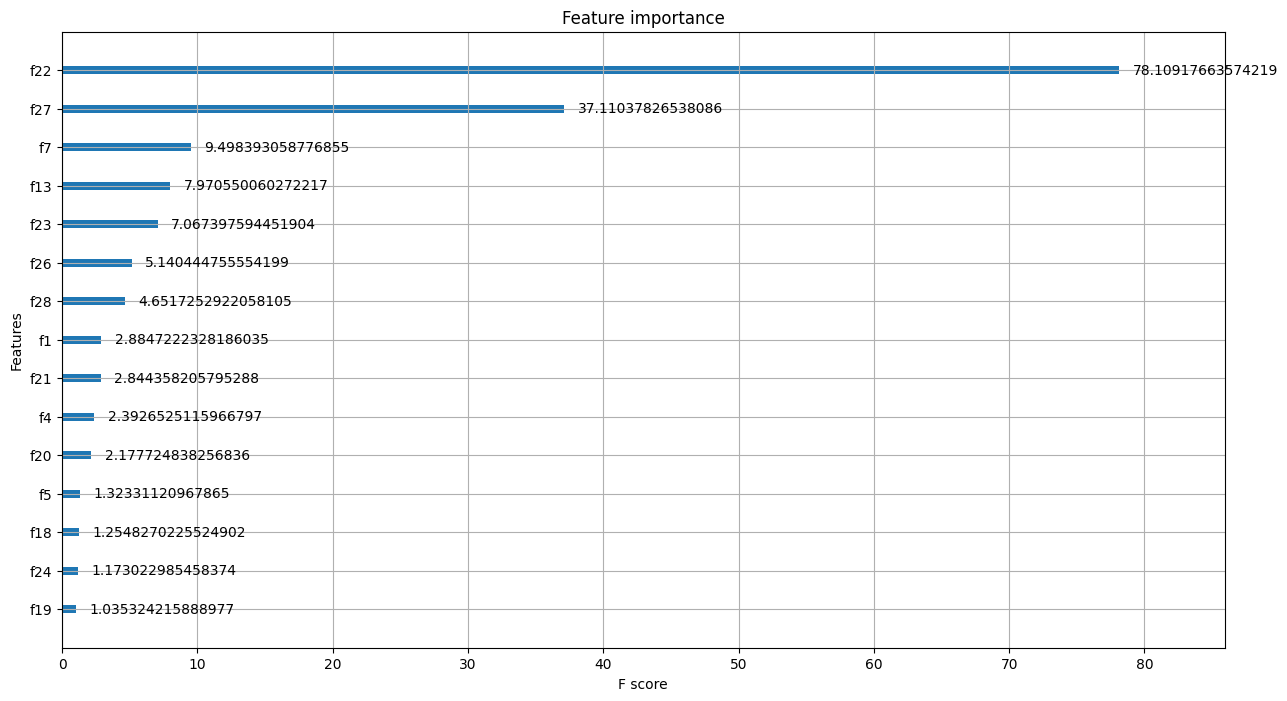

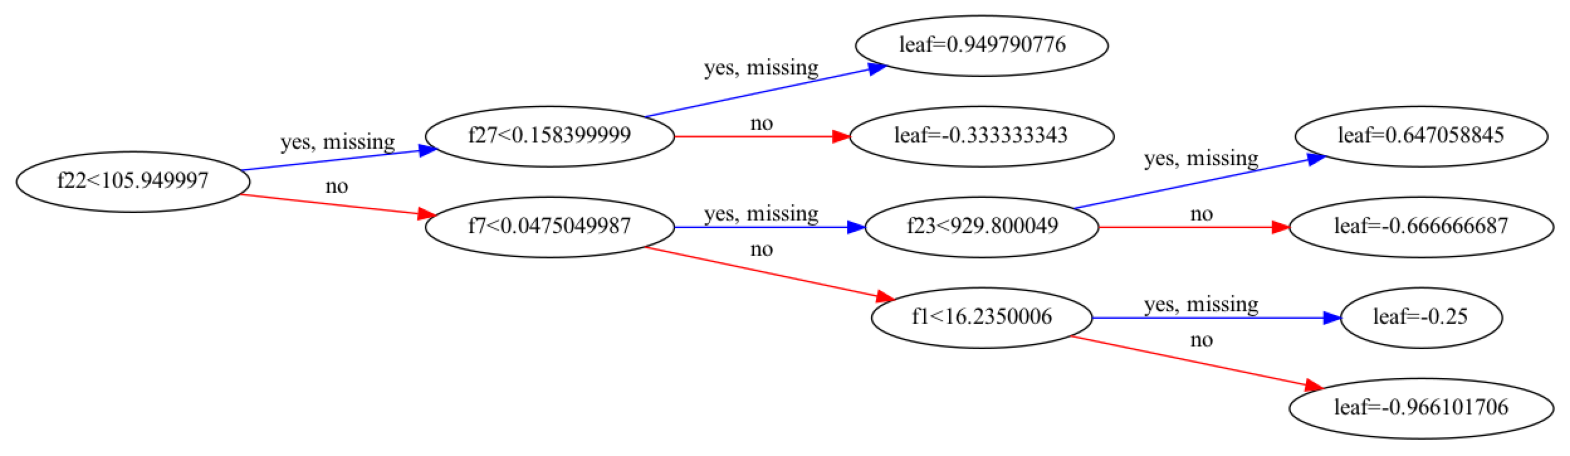

In [31]:
print('Feature Importances:')
print(model.feature_importances_)

import xgboost as xgb

feature_data = xgb.DMatrix(X_test)
model.get_booster().feature_names = feature_data.feature_names
model.get_booster().feature_types = feature_data.feature_types

!pip install matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(model, ax=ax, importance_type='gain')

!pip install graphviz
xgb.plot_tree(model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()